<a href="https://colab.research.google.com/github/PLEX-GR00T/Data_Mining/blob/main/CNN_model_kartikeya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN
We begin by loading the faces data from sklearn library

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

Below are some samples from the dataset

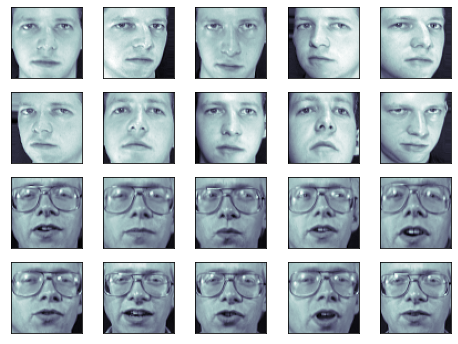

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

We can see below the target values in our data. There are 40 unique classes in our dataset

In [ ]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Now, let's split our images into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    faces.images, faces.target, random_state=0, stratify=faces.target)

print(X_train.shape, X_test.shape)

(300, 64, 64) (100, 64, 64)


## Building and training a CNN
Below, we train a simple CNN model that utilises convolution layers, dropouts and max-pooling. We use SparseCategoricalCrossentropy loss as this is a multi-classification problem and are therefore using softmax activation in our final layer.

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,1), activation='relu'),
    MaxPool2D(),
    Dropout(rate=0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(rate=0.2),
    Flatten(),
    Dense(40, activation = 'softmax')
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 6s 134ms/step - loss: 3.7682 - acc: 0.0100 - val_loss: 3.6869 - val_acc: 0.0300
Epoch 2/20
10/10 [==============================] - 0s 32ms/step - loss: 3.6799 - acc: 0.0433 - val_loss: 3.6738 - val_acc: 0.1900
Epoch 3/20
10/10 [==============================] - 0s 37ms/step - loss: 3.6133 - acc: 0.0867 - val_loss: 3.5373 - val_acc: 0.1600
Epoch 4/20
10/10 [==============================] - 0s 33ms/step - loss: 3.3881 - acc: 0.1933 - val_loss: 3.1438 - val_acc: 0.4200
Epoch 5/20
10/10 [==============================] - 0s 31ms/step - loss: 2.8903 - acc: 0.3600 - val_loss: 2.5675 - val_acc: 0.5200
Epoch 6/20
10/10 [==============================] - 0s 35ms/step - loss: 2.3174 - acc: 0.5233 - val_loss: 2.0423 - val_acc: 0.4800
Epoch 7/20
10/10 [==============================] - 0s 28ms/step - loss: 1.5701 - acc: 0.7233 - val_loss: 1.4124 - val_acc: 0.7100
Epoch 8/20
10/10 [==============================] - 0s 36ms/step - loss: 1.1579 - acc: 0.7833

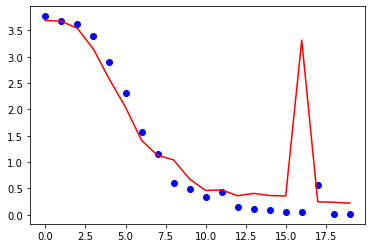

In [ ]:
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'], 'r')

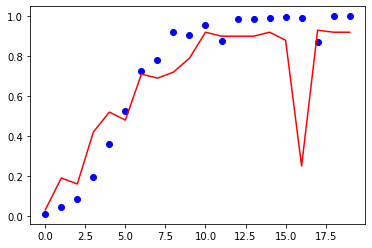

In [ ]:
plt.plot(hist.history['acc'], 'bo')
plt.plot(hist.history['val_acc'], 'r')

In the above graphs, we can see the loss on training and validation sets keeps decreasing while the accuracy on both increases.

## Data augmentation

Now, let us try augmenting the data. We know that neural networks perform best in when they have large amounts of data. We will create an augmentation for each image in our training set by randomly flipping it horizontally and adding a random rotation between 0° and 20°.

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation 

data_augmentation = Sequential([
  RandomFlip('horizontal'),
  RandomRotation(0.1),
])

In [ ]:
aug_x, aug_y = [], []
for i in range(len(X_train)):
    for _ in range(5):
        aug_image = data_augmentation(X_train[i].reshape(64,64,1), training=True) 
        aug_x.append(aug_image.numpy().reshape(64,64))
        aug_y.append(y_train[i])

A sample augmented image looks as follows:

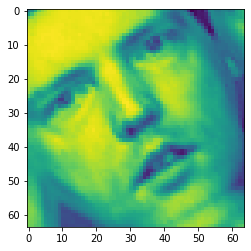

In [ ]:
plt.imshow(aug_x[0])

The original image for the above augmentation was this:

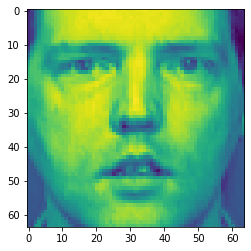

In [ ]:
plt.imshow(X_train[0])

We will now be adding these augmented images to our training data, and retraining the CNN model

In [ ]:
import numpy as np

aug_x_train = np.vstack((X_train, np.array(aug_x)))
aug_y_train = np.hstack((y_train, aug_y))

In [ ]:
model_aug = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,1), activation='relu'),
    MaxPool2D(),
    Dropout(rate=0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(rate=0.2),
    Flatten(),
    Dense(40, activation = 'softmax')
])

model_aug.compile(loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [ ]:
hist_aug = model_aug.fit(aug_x_train, aug_y_train,
                         validation_data=(X_test, y_test), epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 2s 18ms/step - loss: 3.6372 - acc: 0.0561 - val_loss: 3.2684 - val_acc: 0.1200
Epoch 2/20
57/57 [==============================] - 1s 12ms/step - loss: 2.4892 - acc: 0.3817 - val_loss: 1.4269 - val_acc: 0.7100
Epoch 3/20
57/57 [==============================] - 1s 12ms/step - loss: 1.1949 - acc: 0.6967 - val_loss: 0.8835 - val_acc: 0.7400
Epoch 4/20
57/57 [==============================] - 1s 12ms/step - loss: 0.6845 - acc: 0.8150 - val_loss: 1.0685 - val_acc: 0.6900
Epoch 5/20
57/57 [==============================] - 1s 12ms/step - loss: 0.4000 - acc: 0.8889 - val_loss: 0.4753 - val_acc: 0.8600
Epoch 6/20
57/57 [==============================] - 1s 12ms/step - loss: 0.2736 - acc: 0.9289 - val_loss: 0.4492 - val_acc: 0.8600
Epoch 7/20
57/57 [==============================] - 1s 12ms/step - loss: 0.1762 - acc: 0.9578 - val_loss: 0.3160 - val_acc: 0.9400
Epoch 8/20
57/57 [==============================] - 1s 12ms/step - loss: 0.1169 - acc: 0.9756 

In [ ]:
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)       

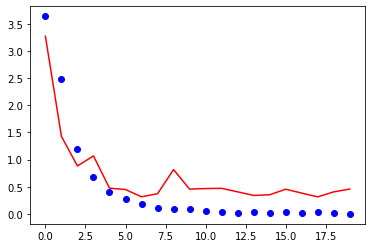

In [ ]:
plt.plot(hist_aug.history['loss'], 'bo')
plt.plot(hist_aug.history['val_loss'], 'r')

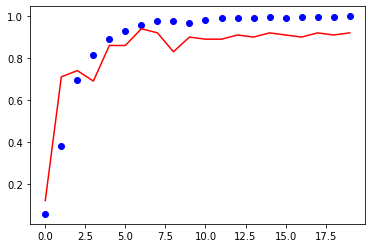

In [ ]:
plt.plot(hist_aug.history['acc'], 'bo')
plt.plot(hist_aug.history['val_acc'], 'r')

We see that adding more data for training was beneficial, as the model is no longer overfitting on the training data, and has improved accuracy over the test data. Moreover, the graphs for the model trained on augmented data do no have huge fluctuations. In contrast to PCA + SVC model trained in class, these models are not just more accurate, we are no longer calculating the principal components in our data, and manually setting the number of components required. We instead leave this task to the CNN model which is able to introduce non-linearity due to the presence of multiple layers and uses kernels to identify relevant features.

Our CNN based model is also more robust to rotated images, as the original data lacked such images.

## Summary

In this assignment, we saw how to create a simple convolutional neural network and explored some data augmentation techniques for image data.